# Problem Statement



<html> <font color = Darkblue>
The purpose is to predict whether the Pima Indian women shows signs of diabetes or not. We are using a dataset collected by "National Institute of Diabetes and Digestive and Kidney Diseases" which consists of a number of attributes which would help us to perform this prediction. A brief description of the attributes is given here below: 
    
<br> Preg: Number of times pregnant
<br> Plas: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
<br> Pres: Diastolic blood pressure (mm Hg)
<br> skin: Triceps skin fold thickness (mm)
<br> test: 2-Hour serum insulin (mu U/ml)
<br> mass: Body mass index (weight in kg/(height in m)^2)
<br> pedi: Diabetes pedigree function
<br> age: Age (years)
<br> class: Class variable (0 or 1)

</font>
</html>

<html>
<font color = blue>
<b>Constraints on data collection </b>

</font>
</html>

<html> <font color = Darkblue>
All patients whose data has been collected are females at least 21 years old of Pima Indian heritage
</font>
</html>

In [100]:
#Import all the necessary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

# Q1. Load the PIMA Indian Diabetes file into Python DataFrame. 


In [101]:
df = pd.read_csv('pima-indians-diabetes.csv')

It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the dataset. You would notice that it is a comma separated file.

# Q2. Print 10 samples from the dataset

In [102]:
df.head(10)

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


# Q3 Print the datatypes of each column and the shape of the dataset 

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Preg     768 non-null int64
Plas     768 non-null int64
Pres     768 non-null int64
skin     768 non-null int64
test     768 non-null int64
mass     768 non-null float64
pedi     768 non-null float64
age      768 non-null int64
class    768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


There are '0's in the data. Are they really valid '0's or they are missing values?
Plasma, BP, skin thickness etc. these values cannot be 0.
look at column by column logically to understand this.


# Q4 Replace all the 0s in the column with the median of the same column value accordingly.

In [104]:
print("Number of 0 entries for Plasma(Before Replacing): ",df.Plas[df.Plas == 0].count())
print("Number of 0 entries for BP(Before Replacing): ",df.Pres[df.Pres == 0].count())
print("Number of 0 entries for Skin Thickness(Before Replacing): ",df.skin[df.skin == 0].count())

df[['Plas','Pres','skin']] = df[['Plas','Pres','skin']].replace(0, df[['Plas','Pres','skin']].median())

print("Number of 0 entries for Plasma(After Replacing): ",df.Plas[df.Plas == 0].count())
print("Number of 0 entries for BP(After Replacing): ",df.Pres[df.Pres == 0].count())
print("Number of 0 entries for Skin Thickness(After Replacing): ",df.skin[df.skin == 0].count())

Number of 0 entries for Plasma(Before Replacing):  5
Number of 0 entries for BP(Before Replacing):  35
Number of 0 entries for Skin Thickness(Before Replacing):  227
Number of 0 entries for Plasma(After Replacing):  0
Number of 0 entries for BP(After Replacing):  0
Number of 0 entries for Skin Thickness(After Replacing):  0


In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Preg     768 non-null int64
Plas     768 non-null int64
Pres     768 non-null int64
skin     768 non-null int64
test     768 non-null int64
mass     768 non-null float64
pedi     768 non-null float64
age      768 non-null int64
class    768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# Q5 Print the descriptive statistics of each & every column using describe() function

In [106]:
df.describe()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,27.334635,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,9.229014,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,23.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Q6 See the distribution of 'Class' variable and plot it using appropriate graph.

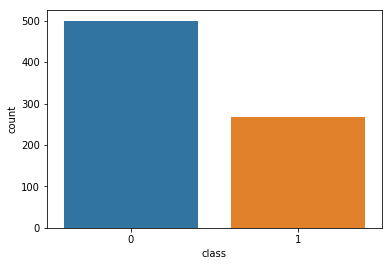

In [107]:
sns.countplot(x='class', data=df)

In [108]:
df['class'].value_counts()

0    500
1    268
Name: class, dtype: int64

#Just for your understanding - Using univariate analysis check the individual attributes for their basic statistic such as central values, spread, tails etc. What are your observations (any two attributes). Its an optional step and will not be graded.

In [109]:
df[['age','mass']].describe()

,age,mass
count,768.000000,768.000000
mean,33.240885,31.992578
std,11.760232,7.884160
min,21.000000,0.000000
25%,24.000000,27.300000
50%,29.000000,32.000000
75%,41.000000,36.600000
max,81.000000,67.100000


{'whiskers': [<matplotlib.lines.Line2D at 0x1a29e78b38>,
 'caps': [<matplotlib.lines.Line2D at 0x1a29ee3438>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a29e789e8>],
 'medians': [<matplotlib.lines.Line2D at 0x1a29ee3c88>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a29eeb0f0>],
 'means': []}

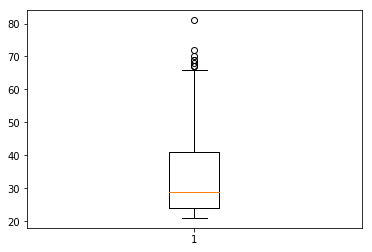

In [110]:
plt.boxplot(x='age', data=df)

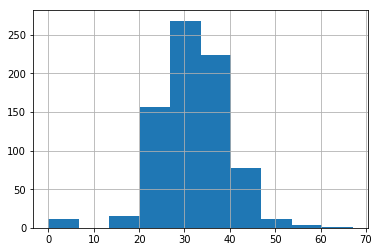

In [111]:
df['mass'].hist()

# Q7. Use pairplots and correlation method to observe the relationship between different variables and state your insights.
Hint: Use seaborn plot and check the relationship between different variables 


Using the plot - infer the relationship between different variables

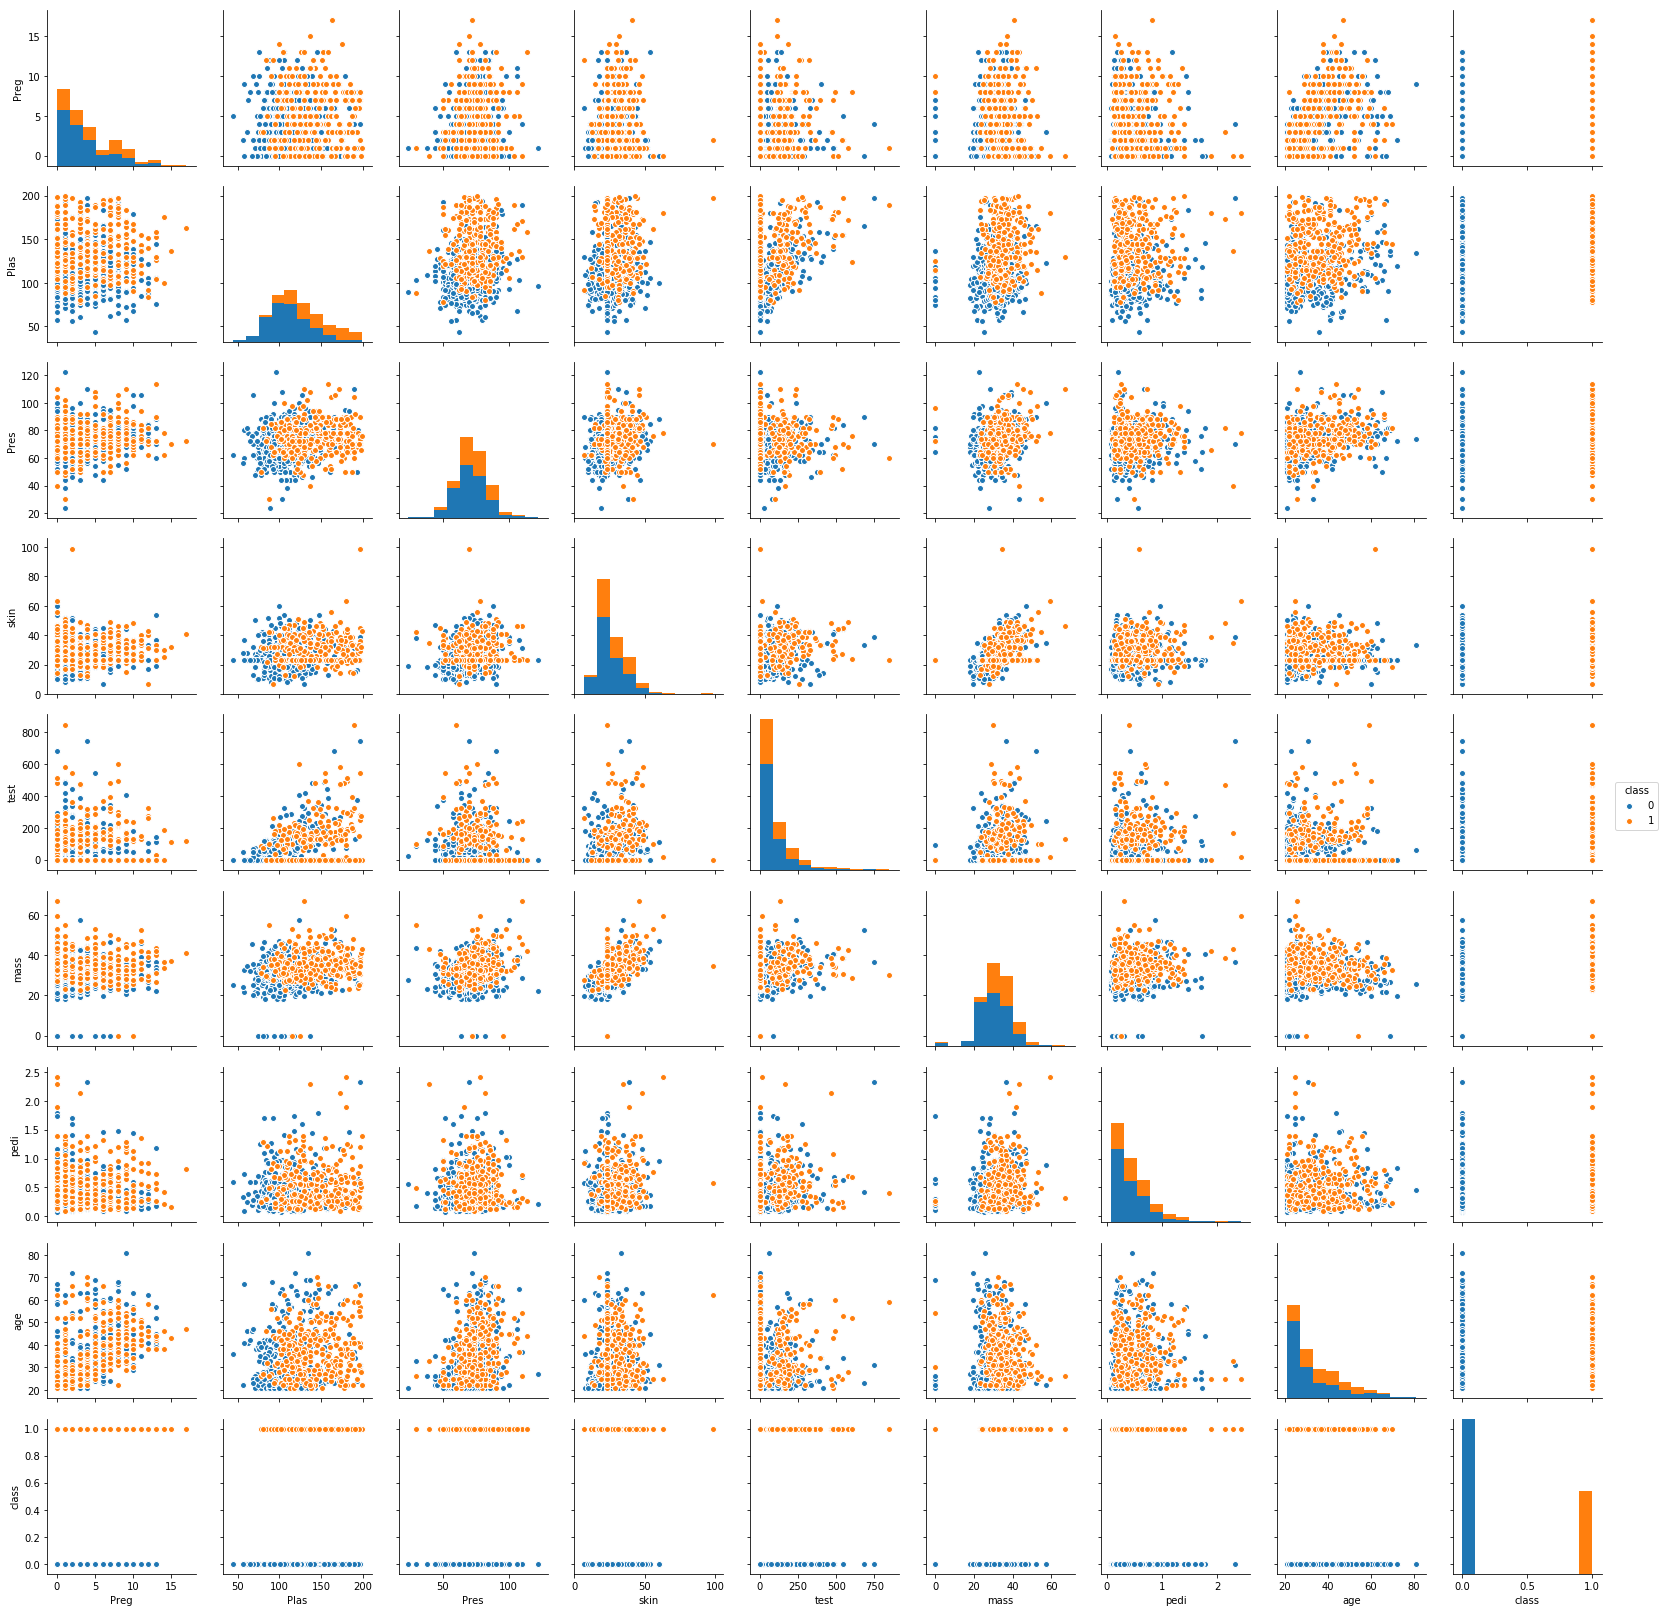

In [112]:
sns.pairplot(df, hue='class')

# Q8 Split the pima_df into training and test set in the ratio of 70:30 (Training:Test).</b>


In [113]:
X = df.drop(labels='class', axis=1)
y = df['class']
print(X.shape)
print(y.shape)

(768, 8)
(768,)


In [114]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=1)

# Q9 Create the decision tree model using “entropy” method of reducing the entropy and fit it to training data.</b>



In [115]:
dtc_model = DecisionTreeClassifier(criterion='entropy')
dtc_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [116]:
y_pred = dtc_model.predict(X_test)

# Q10 Print the accuracy of the model & print the confusion matrix 

In [117]:
print("Accuracy for Train Data: ", dtc_model.score(X_train, y_train))

Accuracy for Train Data:  1.0


In [118]:
print("Accuracy for Test Data : ", dtc_model.score(X_test, y_test))

Accuracy for Test Data :  0.7272727272727273


In [119]:
print(' ------------- Confusion Matrix ----------')
metrics.confusion_matrix(y_test, y_pred)

 ------------- Confusion Matrix ----------


array([[113,  33],
       [ 30,  55]])

Print the feature importance of the decision model - Optional

In [120]:
feature_names = X.columns
feature_importance = dtc_model.feature_importances_
print(" ============ Feature Importance ======= ")
print(feature_names)
print(feature_importance)

 ============ Feature Importance ======= 
Index(['Preg', 'Plas', 'Pres', 'skin', 'test', 'mass', 'pedi', 'age'], dtype='object')
[0.10131523 0.24483258 0.14389837 0.05536206 0.         0.24362697
 0.08241677 0.12854801]


In [122]:
print (pd.DataFrame(dtc_model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp', ascending=False))

           Imp
Plas  0.244833
mass  0.243627
Pres  0.143898
age   0.128548
Preg  0.101315
pedi  0.082417
skin  0.055362
test  0.000000


In [99]:
from IPython.display import Image  
#import pydotplus as pydot
from sklearn import tree
from os import system

train_char_label = ['No', 'Yes']

Credit_Tree_File = open('pima_tree.dot','w')
dot_data = tree.export_graphviz(dtc_model, out_file=Credit_Tree_File, feature_names = list(X_train), class_names = list(train_char_label))

Credit_Tree_File.close()

